<a href="https://colab.research.google.com/github/BryanYunche/Z-score-e-Binomial-Distribution-Claudomiro-Atividade-01/blob/main/LLM_Atividade01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMANDO: Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.

# Dataset

Fehrman, E., Egan, V., & Mirkes, E. (2015). Drug Consumption (Quantified) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TC7S.

https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified

## Drug Consumption (Quantified)

Escolhi o dataset sobre o consumo de drogas pois é um tema muito intuitivo traz uma abordagem que prende a atenção de que está análizando os dados.

Dentro desse dataset tem várias classes sobre diferentes drogas e as métricas levantadas sobre a interação das pessoas com elas. Ao todo, o dataset separa em sete classes: *"Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".*

Desses resultados, podemos binarizar em:
- Usuário: *"Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day"*

- Não Usuário: *"Never Used"*

Para esta atividade, irei fazer Histogramas sobre a Cannabis inicialmente para mostrar somo foi feito o histograma para cada feature, em seguida irei testar a sobreposição das duas features em relação a todas as classes de dogras do dataset

As features que irei utilizar são sobre Pessoas Disciplinadas e Pessoas que Buscam sensasões/Adrenalina. O meu objetivo ao fazer esses dois histogramas é entender como o perfil comportamental estão relacionados aos casos de uso de Drogas.

### Hipotese Nula (O que eu planejo observar)
*"Pessoas que buscam adrenalina são mais sucetiveis a consumo de drogas que pessoas disciplinadas"*


# Features Analisadas
- conscientiousness (Disciplinado)
- sensation seeking (busca por sensações/adrenalina)

# Bibliotecas importadas para tratamento de Dados

In [350]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Explorando o dataset

In [351]:
df = pd.read_csv('drug_consumption.data')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         1884 non-null   int64  
 1   0.49788   1884 non-null   float64
 2   0.48246   1884 non-null   float64
 3   -0.05921  1884 non-null   float64
 4   0.96082   1884 non-null   float64
 5   0.12600   1884 non-null   float64
 6   0.31287   1884 non-null   float64
 7   -0.57545  1884 non-null   float64
 8   -0.58331  1884 non-null   float64
 9   -0.91699  1884 non-null   float64
 10  -0.00665  1884 non-null   float64
 11  -0.21712  1884 non-null   float64
 12  -1.18084  1884 non-null   float64
 13  CL5       1884 non-null   object 
 14  CL2       1884 non-null   object 
 15  CL0       1884 non-null   object 
 16  CL2.1     1884 non-null   object 
 17  CL6       1884 non-null   object 
 18  CL0.1     1884 non-null   object 
 19  CL5.1     1884 non-null   object 
 20  CL0.2     1884 non-null   obje

## Compreendendo o formato do Dataset

Perceba que o Dataset está definido em 12 atributos que falam sobre a pessoa entrevistada:
- neuroticism (Neoroticismo)
- extraversion (Extrovertido)
- openness to experience (Aventureiro)
- agreeableness (Empático)
- conscientiousness (Disciplinado)
- impulsivity (Impulsivo)
- sensation seeking (busca por sensações/adrenalina)
- level of education (Educação)
- age (Idade)
- gender (Genero)
- country of residence (País)
- ethnicity (Etnia)

E oustros 18 atributos a respeito das drogas entrevistadas.
- Alcohol
- Amphet
- Amyl
- Benzos
- Caff
- Cannabis
- Choc
- Coke
- Crack
- Ecstasy
- Heroin
- Ketamine
- Legalh
- LSD
- Meth
- Mushrooms
- Nicotine
- Semer (Droga Ficticia pra detectar mentira)
- VSA

In [352]:
colunas = ['ID', 'Idade', 'Genero', 'Educação', 'País', 'Etinia',
           'Neuroticismo', 'Extrovertido', 'Aventureiro', 'Empático', 'Disciplinado',
           'Impulsivo', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
           'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
           'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
           'Nicotine', 'Semer', 'VSA']

df = pd.read_csv('drug_consumption.data', names=colunas)

# df.info()

# Binarizando em Usuários e Não usuários por meio de uma função

In [353]:
def usuario(valor_coluna):
  nao_usuario = ['CL0', 'CL1']

  if valor_coluna in nao_usuario:
    return 0
  else:
    return 1


## Criando a coluna para usuários de Cannabis

In [354]:
df['Usuario_Cannabis'] = df['Cannabis'].apply(usuario)

# df.info()

# Normalizando as Features para usar no Histograma

In [355]:
df['Pessoa_Disciplinada'] = df['Disciplinado'].astype(float)
df['Pessoa_Adrenalina'] = df['SS'].astype(float)

df.head()

,ID,Idade,Genero,Educação,País,Etinia,Neuroticismo,Extrovertido,Aventureiro,Empático,...,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Usuario_Cannabis,Pessoa_Disciplinada,Pessoa_Adrenalina
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0,-0.00665,-1.18084
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL0,CL2,CL3,CL0,CL4,CL0,CL0,1,-0.14277,-0.21575
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL1,CL0,CL0,CL0,1,-1.01450,0.40148
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1,0.58489,-1.18084
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL2,CL2,CL0,CL0,1,1.30612,-0.21575


# Criando Histogramas

## Histograma sobre o Nível de disciplina de pessoas do Dataset

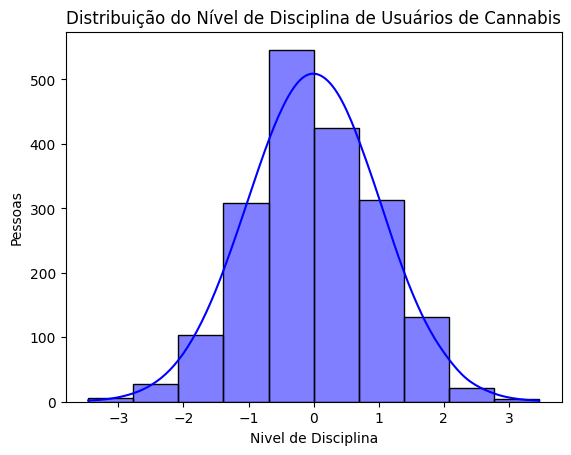

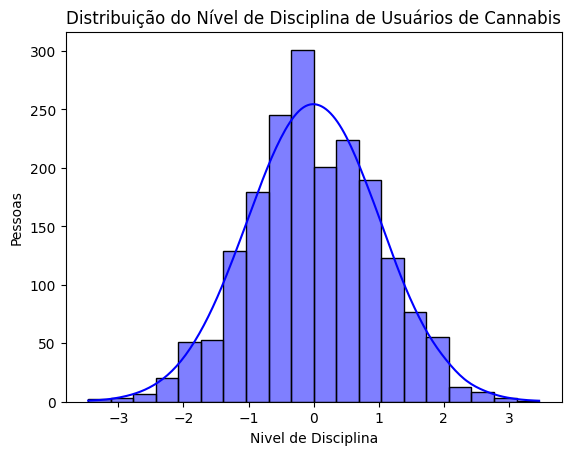

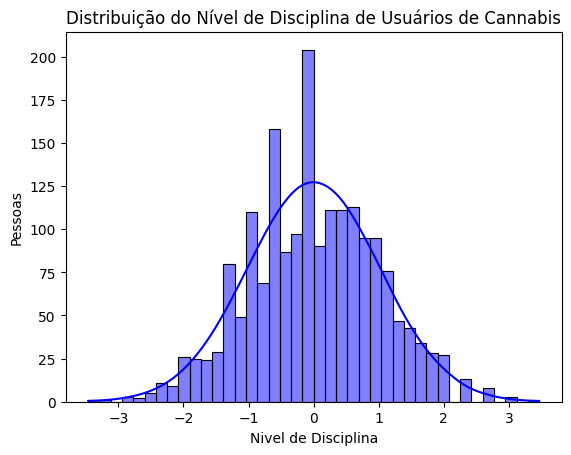

In [356]:
# Número de cortes bins que vai ter o meu histogram vai ser personalizável usando a váriavel abaixo para testar diferentes bins
teste_bins = [10, 20, 40]

for n_bins in teste_bins:
    # Vou pegar agora epenas os valores de pessoas consideradas disciplinadas pelo estudo que usam cannabis
    sns.histplot(data=df, x='Disciplinado', bins=n_bins, color='blue', alpha=0.5, kde=True)

    # Legendas do Histograma
    plt.title('Distribuição do Nível de Disciplina de Usuários de Cannabis')
    plt.xlabel('Nivel de Disciplina')
    plt.ylabel('Pessoas')

    # Show plot
    plt.show()

## Histograma sobre o Nível de intensidade que as pessoas buscam por sensasões/Adrenalina

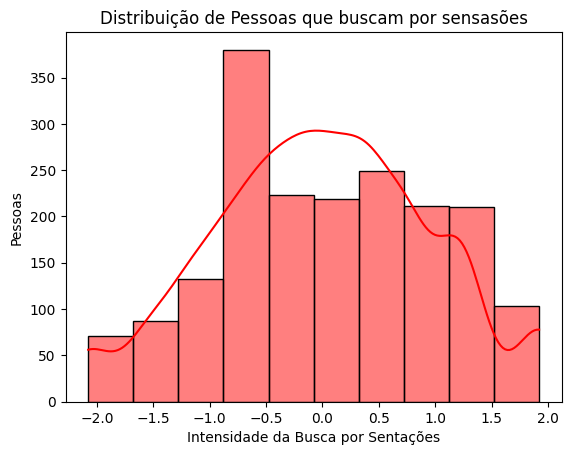

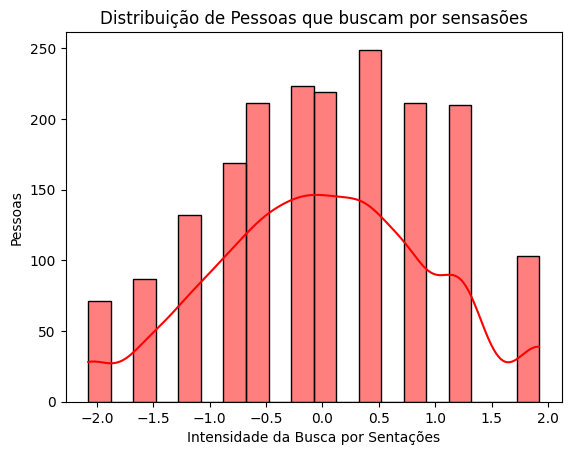

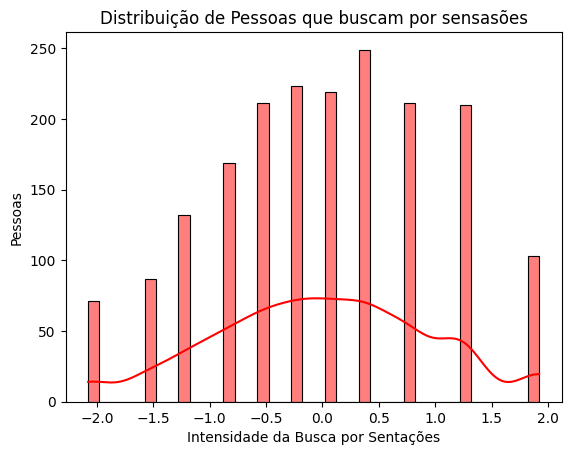

In [357]:
# Número de cortes bins que vai ter o meu histogram vai ser personalizável usando a váriavel abaixo para testar 3 tipos diferentes de bins
teste_bins = [10, 20, 40]

for n_bins in teste_bins:
    # Vou pegar os valores pra pessoas que buscan adrenalina segundo o estudo
    sns.histplot(data=df, x='SS', bins=n_bins, color='red', alpha=0.5, kde=True)

    # Legendas do Histograma
    plt.title('Distribuição de Pessoas que buscam por sensasões')
    plt.xlabel('Intensidade da Busca por Sentações')
    plt.ylabel('Pessoas')

    # Show plot
    plt.show()

# Cruzamento dos Histogramas 

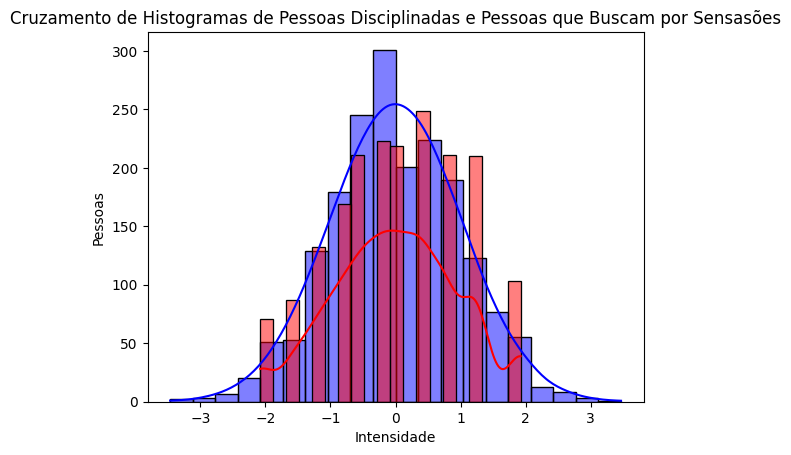

In [363]:
# Vou testar os diferentes valores de bins e sobrepor os Histogramas

# Irei utilizar um valor padrão agora pois irei restar a sobreposição dos histogramas para cada classe de droga dentro do dataset,
n_bins = 20

# Cruzamento dos Histogramas
sns.histplot(df['Pessoa_Disciplinada'], bins=n_bins, color='blue', alpha=0.5, kde=True)
sns.histplot(df['Pessoa_Adrenalina'], bins=n_bins, color='red', alpha=0.5, kde=True)

# Legendas do Histograma
plt.title('Cruzamento de Histogramas de Pessoas Disciplinadas e Pessoas que Buscam por Sensasões')
plt.xlabel('Intensidade')
plt.ylabel('Pessoas')

# Show plot
plt.show()


# Cruzamento de Fetaures com as Classes de Drogas do Dataset

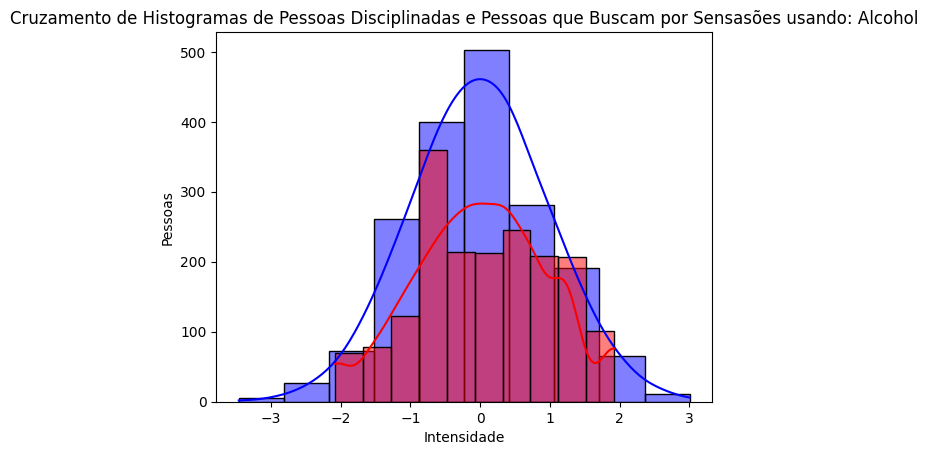

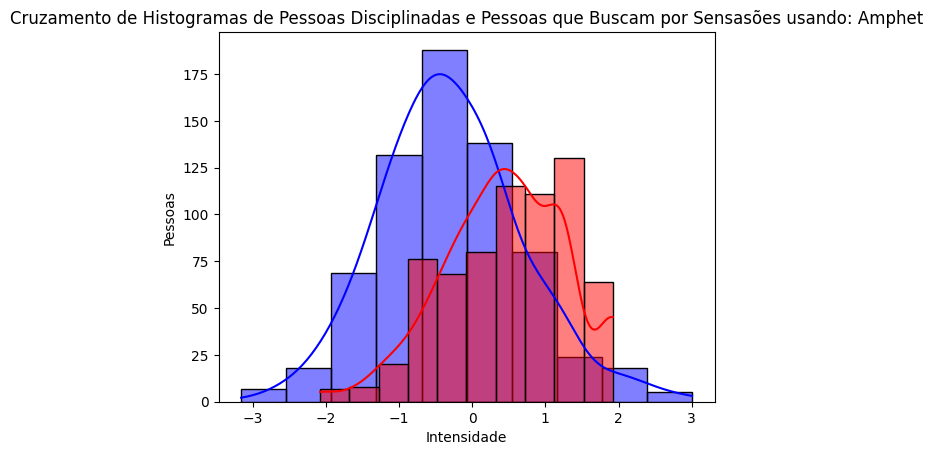

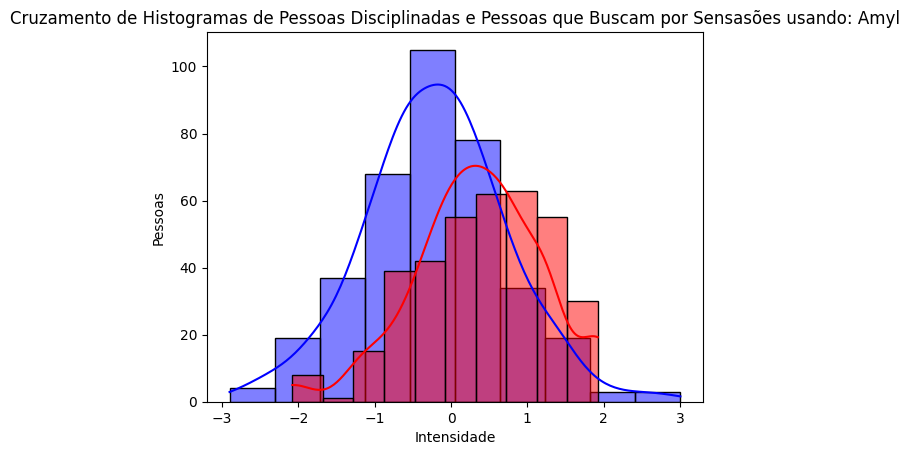

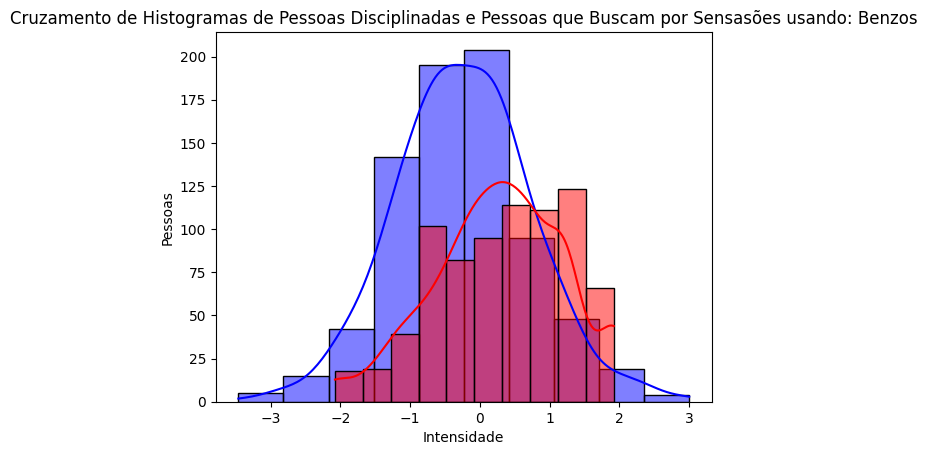

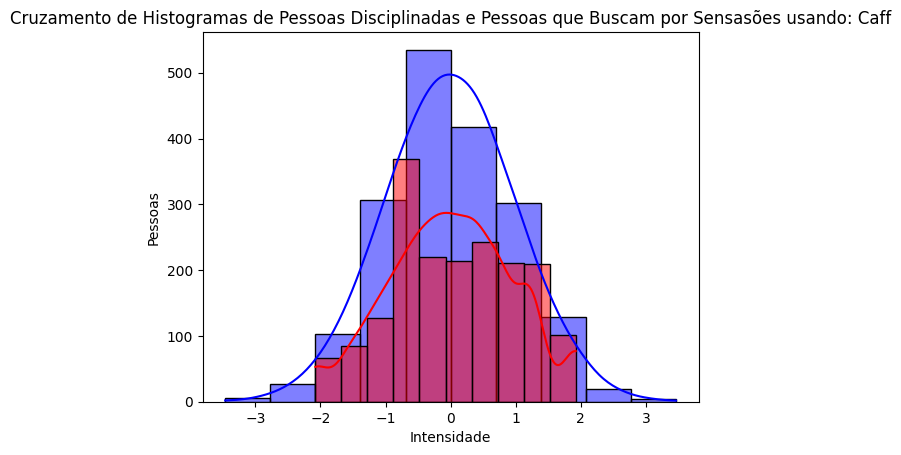

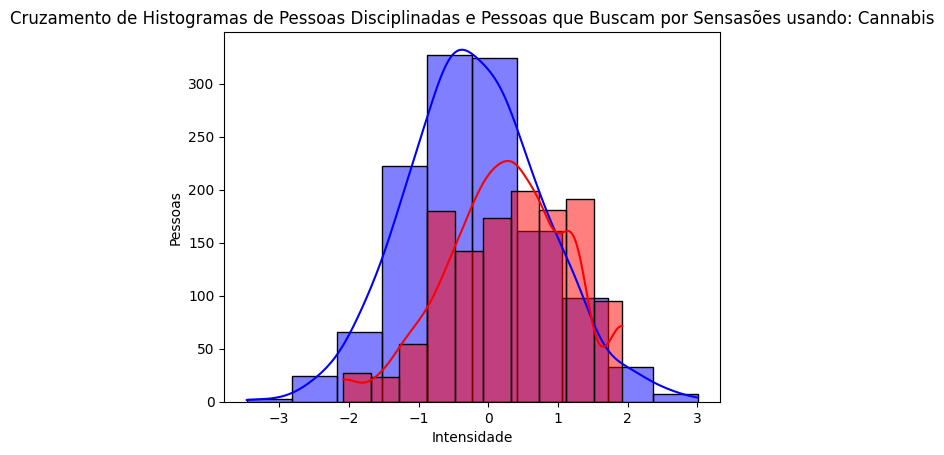

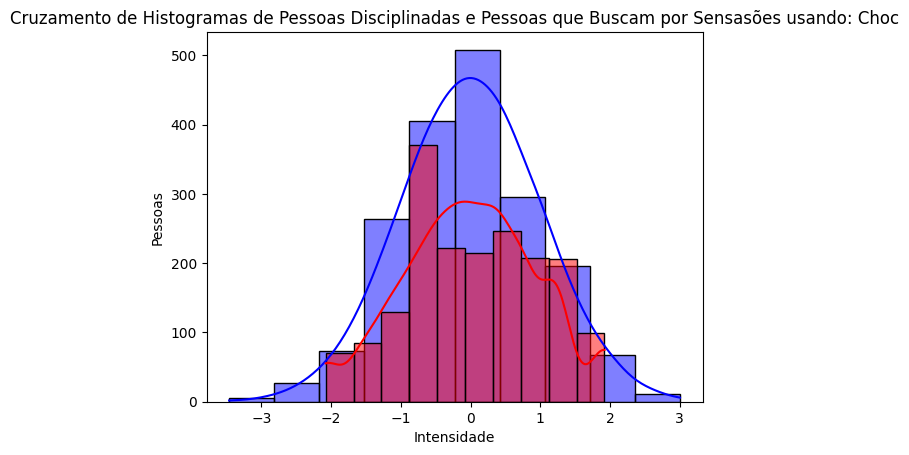

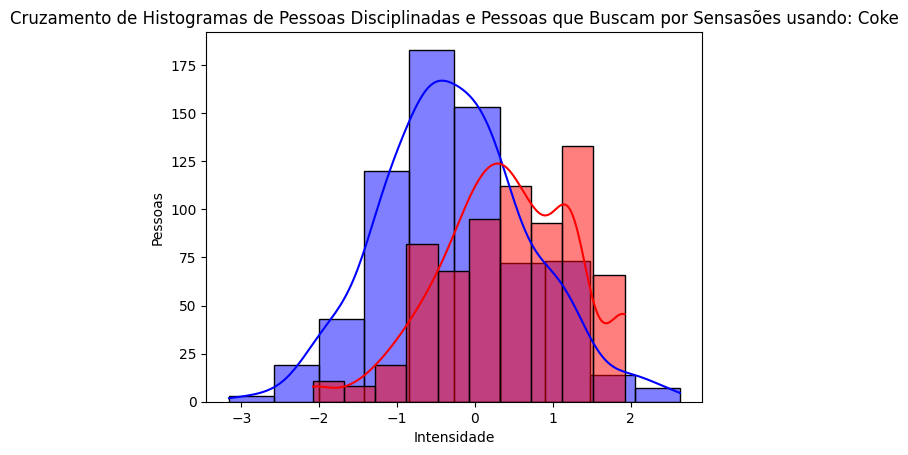

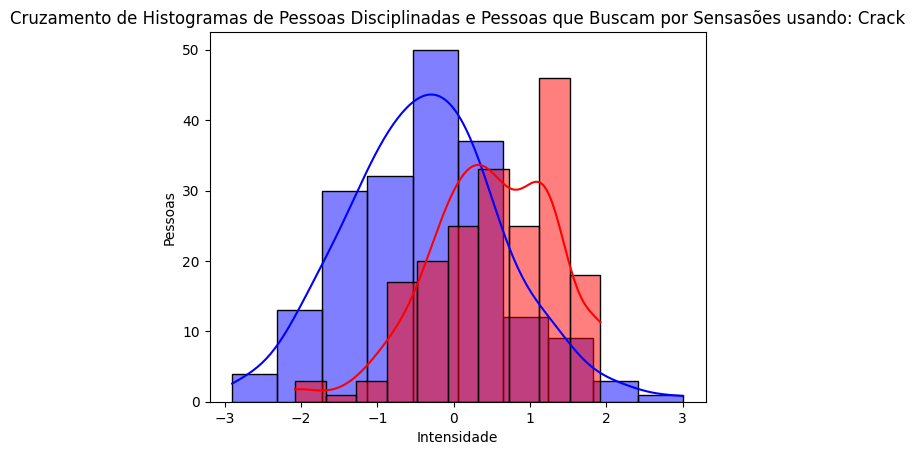

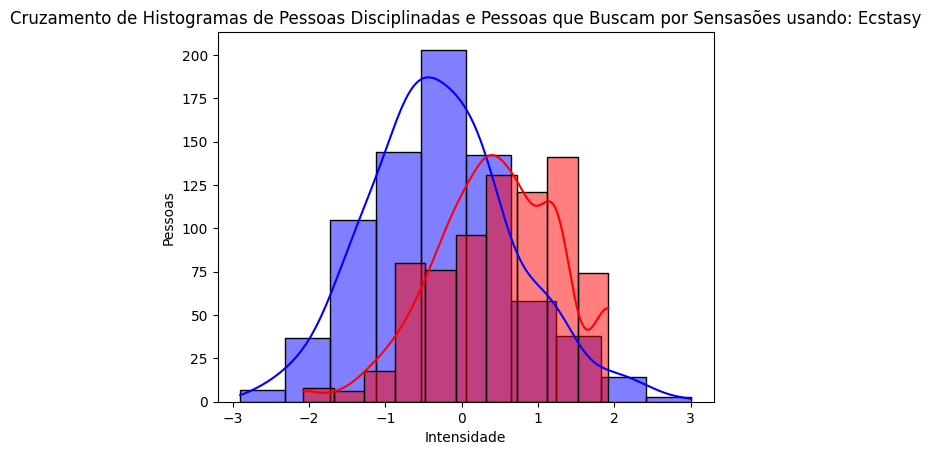

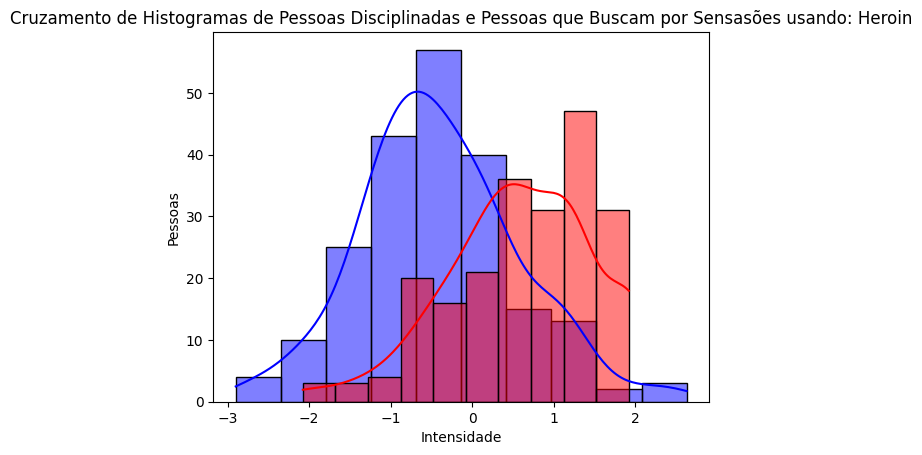

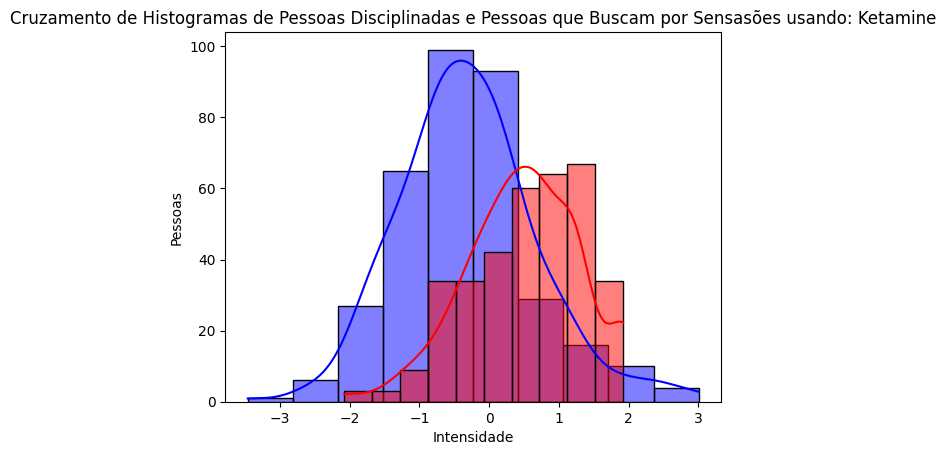

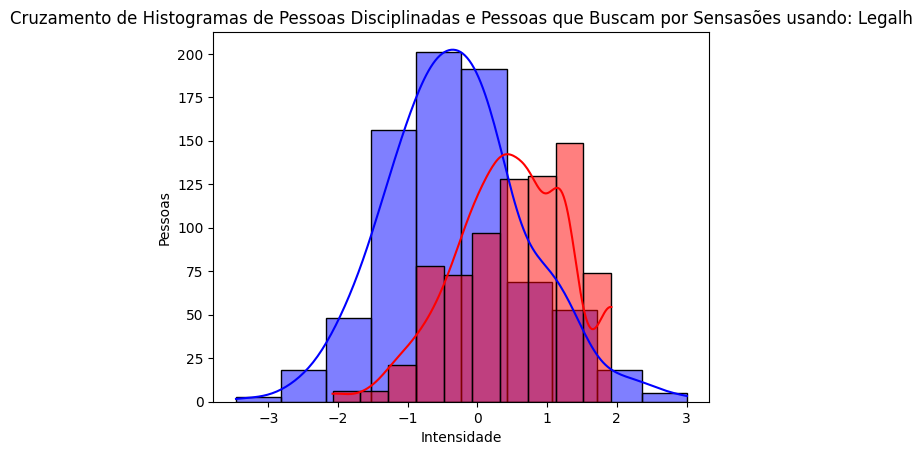

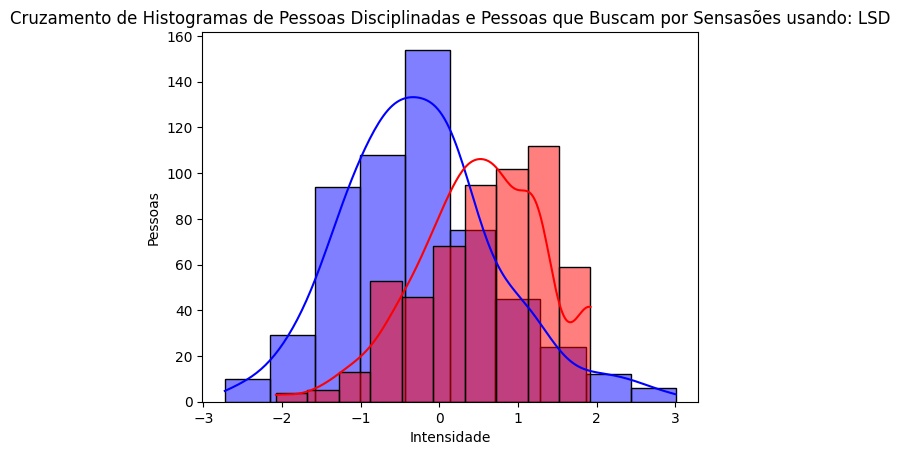

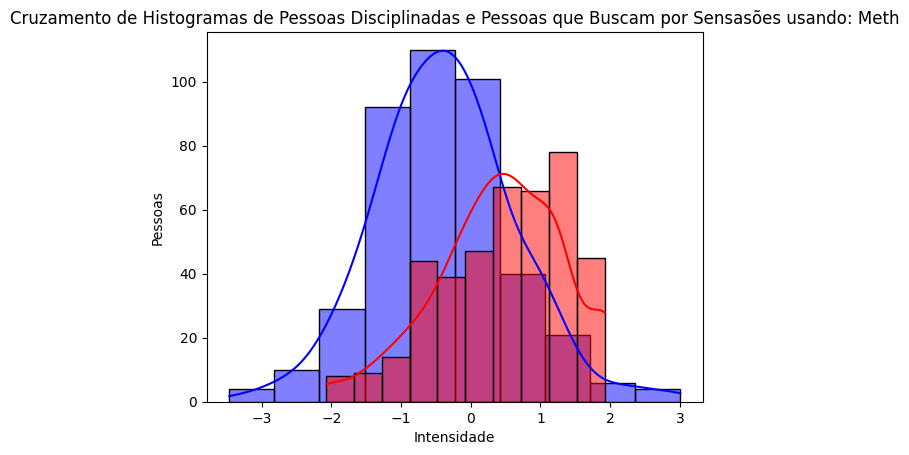

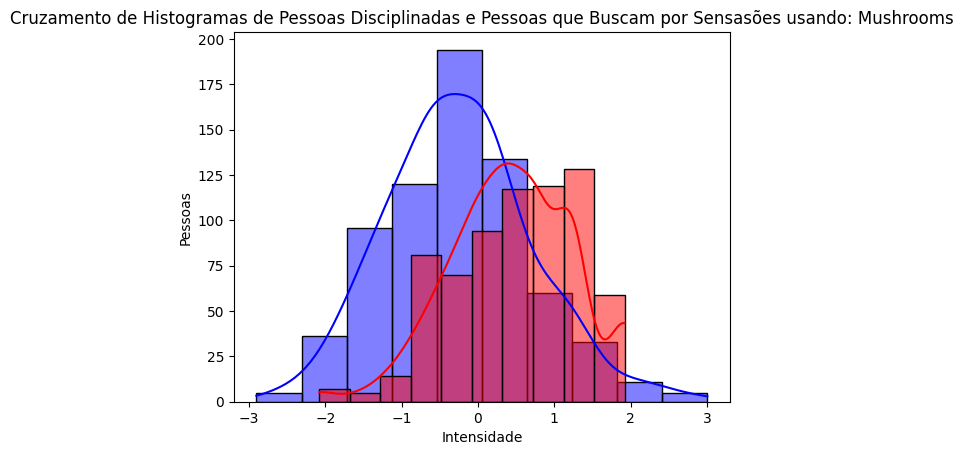

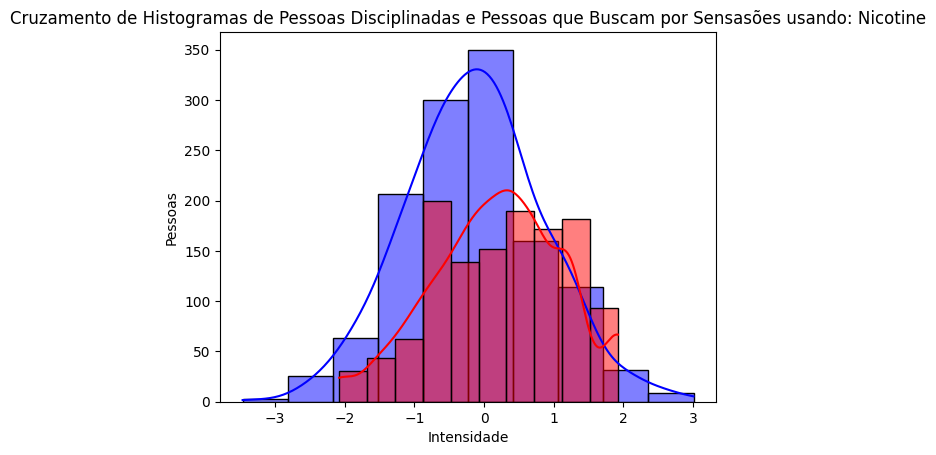

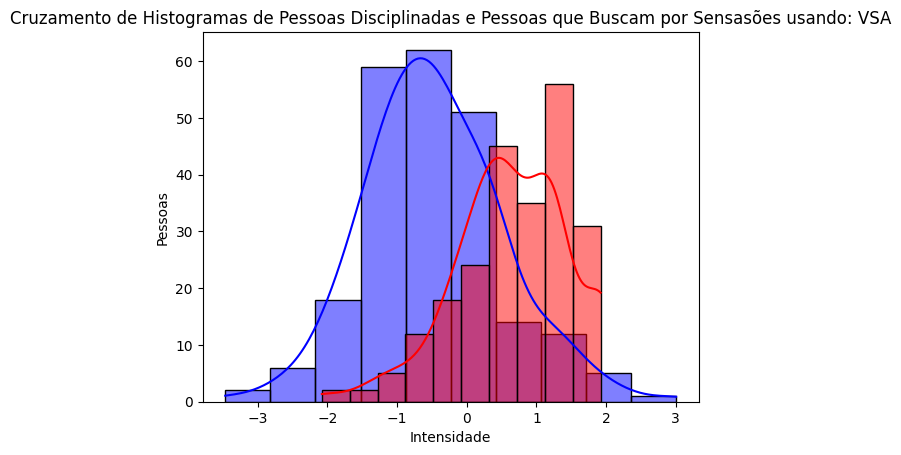

In [374]:
#Valor de Bins
n_bins = 10

# Cada droga é uma classe dentro do Dataset
for coluna in ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']:

    #Verificando usuários por droga
    usuario_droga = ('Usuario_'+ coluna)
    df[usuario_droga] = df[coluna].apply(usuario)
    
    #Selecionando apenas os usuários que efetivamente consumiram droga
    df_usuarios = df[df[usuario_droga] == 1].copy() # Apenas Usuários
    
    
    # Cruzamento dos Histogramas
    sns.histplot(data = df_usuarios, x = 'Pessoa_Disciplinada', bins=n_bins, alpha=0.5, color='blue', kde=True)
    sns.histplot(data = df_usuarios, x = 'Pessoa_Adrenalina', bins=n_bins, alpha=0.5, color='red', kde=True)

    # Legendas do Histograma
    plt.title('Cruzamento de Histogramas de Pessoas Disciplinadas e Pessoas que Buscam por Sensasões usando: ' + coluna)
    plt.xlabel('Intensidade')
    plt.ylabel('Pessoas')

    # Show plot
    plt.show()

### Conclusões - Parte 1
#### Quanto ao contexto
Escolhi esse dataset pois pensei que podia análisar quais tipos de personalidades tem maior probabilidade de serem induzidas ao consumo de drogas.

#### Quanto ao uso de Bins
Quanto ao uso de beans, foi realmente algo interessante, percebi na prática que diferentes tipos de dados e cruzamentos entre features resultam em distribuições
"suaves" ou "furos" no gráfico, tive que muitas vezes calibrar as bins manualmente para poder ficar não só agradável visualmente como mais légivel.

#### Quanto a importância das features
A importância das features para a minha análise foi a dicotomia entre pessoas "disciplinadas" e pessoas que buscam sensasões, aparentemente poucos resultados
divergiram de fato os dois tipos de pessoas, o que foi uma _surpresa_ pra mim, pois eu acreditava que tinha que ser mais separados esses gráficos, mas eles ainda foram bem sobrepostos.

### Hipotese Nula (O que eu planejo observar)
*"Pessoas que buscam adrenalina são mais sucetiveis a consumo de drogas que pessoas disciplinadas"*

Resultado: Nesse ponto, ainda não consegui provar essa hipotese nula.
